In [1]:
# importing all required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Quiz

  * What percent of passengers in Titanic embarked at C?

  * What percent of female passengers in Titanic embarked at C?


### What percent of passengers in Titanic embarked at C?

In [10]:
(df[df['Embarked']=='C']['Embarked'].count()/df['Embarked'].count())*100

18.89763779527559

### What percent of female passengers in Titanic embarked at C?

In [18]:
(df[df['Embarked']=='C'].groupby('Sex')['Embarked'].count()['female']/df['Embarked'].count())*100

8.211473565804274

In [19]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the average value of our dataset.
def compute_mean(dataset):
    """ Main function that calculates the average value across our data. """
    
    return sum(dataset)/len(dataset)

compute_mean(data)

4.391304347826087

### What is the average age of male passengers that survived?

In [24]:
df[df['Survived']==1].groupby('Sex')['Age'].mean()['male']

27.276021505376345

### Activity: Write a function to compute the median from an arbitrary dataset.

In [27]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the exact true median value of our dataset.
# HINT: Consider using DataFrame slicing to help with identifying the correct median value(s).
def compute_median(dataset):
    """ Main function that determines the median value across our data. """
    count = len(dataset)
    mean = -1
    if count < 1:
        return dataset
    if count % 2 == 1:
        # odd number of values
        return dataset[int(np.floor(count/2))]
    else:
        # Even number of values
        return (dataset[count/2]+dataset[(count/2)-1])/2
    
compute_median(data)



7

In [31]:
df = pd.DataFrame({'Rainy':[29,28,32,35,36,12,18,30,45,55,32,32,32,32,32], 'City':['City_A']*5 + ['City_B']*5 + ['City_C']*5})
df

,Rainy,City
0,29,City_A
1,28,City_A
2,32,City_A
3,35,City_A
4,36,City_A
5,12,City_B
6,18,City_B
7,30,City_B
8,45,City_B
9,55,City_B


In [29]:
print(np.mean(df[df['City'] == 'City_A']['Rainy']))

print(np.mean(df[df['City'] == 'City_B']['Rainy']))

print(np.mean(df[df['City'] == 'City_C']['Rainy']))

32.0
32.0
32.0


In [32]:
print(np.std(df[df['City'] == 'City_A']['Rainy']))

print(np.std(df[df['City'] == 'City_B']['Rainy']))

print(np.std(df[df['City'] == 'City_C']['Rainy']))

3.1622776601683795
16.112107248898266
0.0


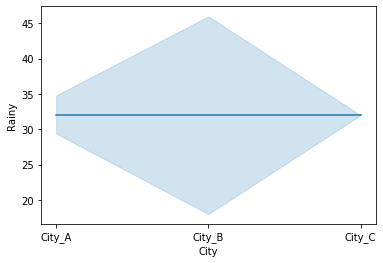

In [34]:
sns.lineplot(y='Rainy', x='City', data=df)
plt.show()

In [35]:
print([32 - np.std(df[df['City'] == 'City_A']['Rainy']), 32 + np.std(df[df['City'] == 'City_A']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_B']['Rainy']), 32 + np.std(df[df['City'] == 'City_B']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_C']['Rainy']), 32 + np.std(df[df['City'] == 'City_C']['Rainy'])])

[28.837722339831622, 35.16227766016838]
[15.887892751101734, 48.11210724889827]
[32.0, 32.0]


In [37]:
df = pd.read_csv('titanic.csv')

ls_fare = df['Fare'].dropna().values

np.percentile(ls_fare, 75)


31.0

In [38]:
# Slice the data based on Fare for those paid less than 31 Dollar
numbers_below_percentile = df[df['Fare'] <= np.percentile(ls_fare, 75)]

# Compute the size of the sliced dataframe and divide over all number of passengers
pr_below_percentile = len(numbers_below_percentile)/len(ls_fare)

pr_below_percentile

0.7508417508417509